In [ ]:
# Importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#uploaded = files.upload()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Data Exploration**

In [ ]:
data = pd.read_csv('survey_results_public.csv')
print(data.head())
print(data.describe())
print(data.info())





   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person) 

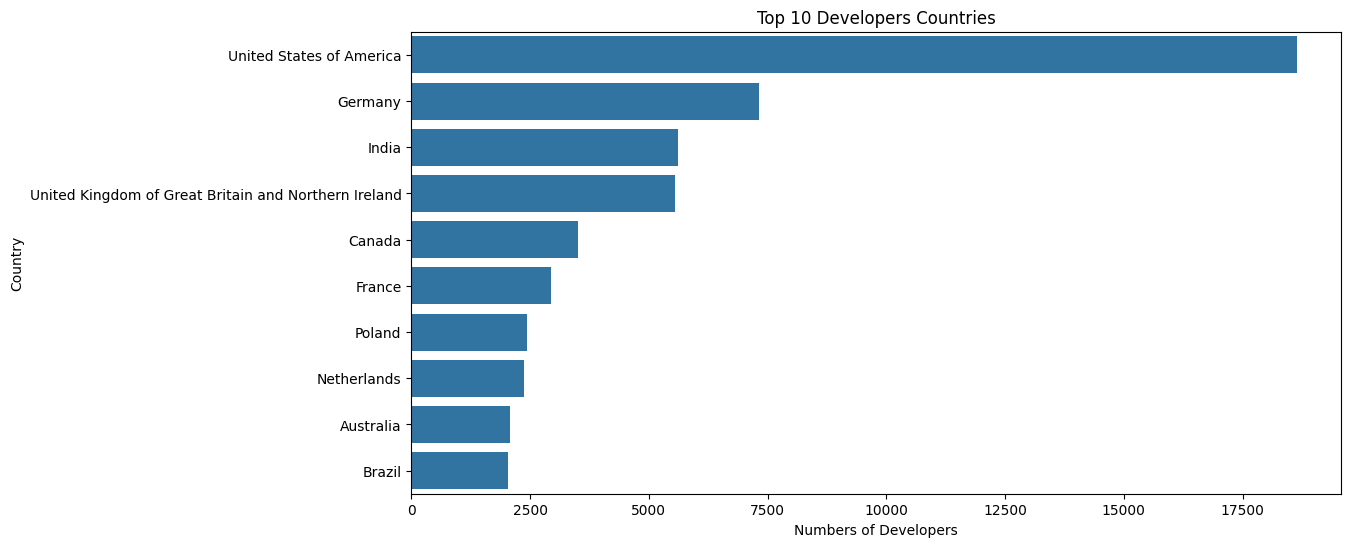

In [ ]:
#Country developers distribution


plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index[:10])
plt.title('Top 10 Developers Countries')
plt.xlabel('Numbers of Developers')
plt.ylabel('Country')
plt.show()

In [ ]:
print(data.columns)



Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [ ]:
print(data.head())

   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person) 

In [ ]:
print("Colunas:", data.columns)

Colunas: Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AI

Country
Afghanistan                             843636.090909
Albania                                  29219.450000
Algeria                                  10069.190476
Andorra                                 120368.800000
Angola                                    4302.000000
                                            ...      
Venezuela, Bolivarian Republic of...     23068.851852
Viet Nam                                 20995.956140
Yemen                                    15089.333333
Zambia                                   13897.800000
Zimbabwe                                 26740.000000
Name: ConvertedCompYearly, Length: 185, dtype: float64


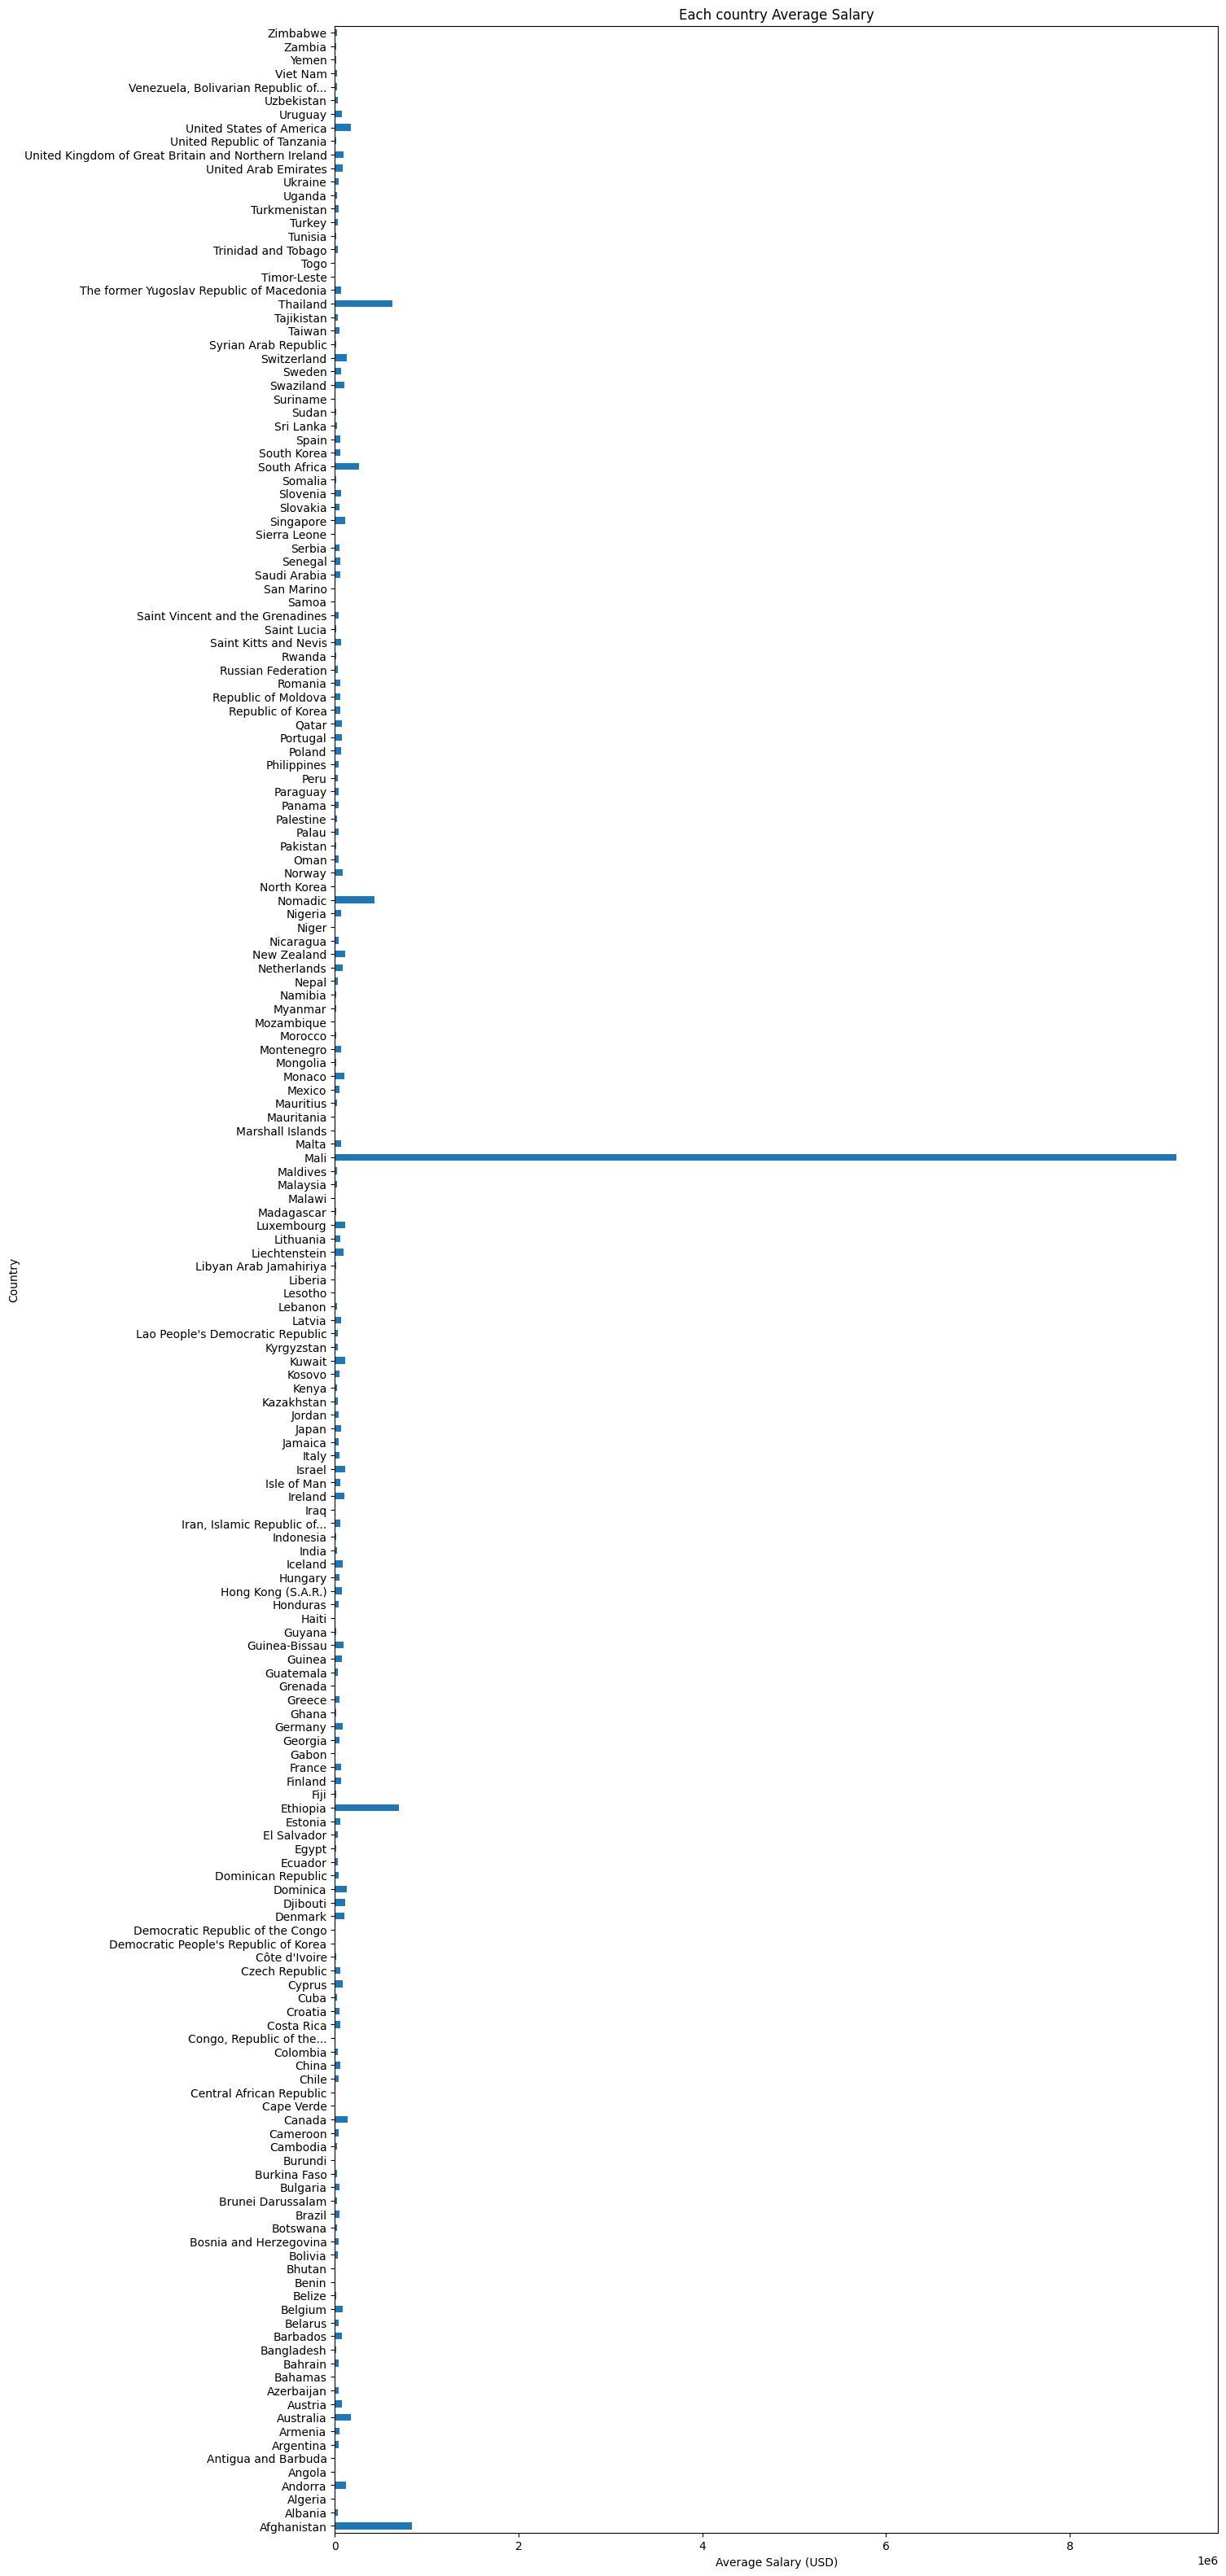

In [ ]:
#groups the data by country and calculates the average of the ConvertedCompYearly column
avg_salary_country = data.groupby('Country')['ConvertedCompYearly'].mean()
print(avg_salary_country)

# Plot the graphic
plt.figure(figsize=(14, 40))
avg_salary_country.plot(kind='barh')
plt.title('Each country Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.show()

In [ ]:
# Check information about DataFrame
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
# Check descriptive statistics
print(data.describe())



         ResponseId     CompTotal       WorkExp  ConvertedCompYearly
count  89184.000000  4.822500e+04  43579.000000         4.801900e+04
mean   44592.500000  1.036807e+42     11.405126         1.031101e+05
std    25745.347541  2.276847e+44      9.051989         6.814188e+05
min        1.000000  0.000000e+00      0.000000         1.000000e+00
25%    22296.750000  6.300000e+04      5.000000         4.390700e+04
50%    44592.500000  1.150000e+05      9.000000         7.496300e+04
75%    66888.250000  2.300000e+05     16.000000         1.216410e+05
max    89184.000000  5.000000e+46     50.000000         7.435143e+07


In [ ]:
# Check for missing values
print(data.isnull().sum())

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64


**Data Preprocessing**

In [ ]:
# Selecting relevant columns
features = ['Age', 'Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']
data = data[features]

# Separte independent variable (X) and dependent (y)
X = data.drop('ConvertedCompYearly', axis=1)
y = data['ConvertedCompYearly']

# Define pré-processing numeric and categorical variabels
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Country', 'EdLevel', 'Employment']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Aply preprocessing to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Add special treatment to the YearsCodePro column
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_train[:, 1], columns=['YearsCodePro'])], axis=1)
X_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(X_test[:, 1], columns=['YearsCodePro'])], axis=1)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions with the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '25-34 years old'

In [ ]:


# Selecionar as colunas relevantes
features = ['Age', 'Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']
data = data[features]

# Separar variáveis independentes (X) e dependente (y)
X = data.drop('ConvertedCompYearly', axis=1)
y = data['ConvertedCompYearly']

# Definir pré-processamento para variáveis numéricas e categóricas
numeric_features = ['Age', 'YearsCodePro']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Country', 'EdLevel', 'Employment']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar pré-processamento aos dados de treino e teste
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '25-34 years old'

**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '25-34 years old'